# Interpolation methods

## Load data
Hydraulic head measurements from Widen site, Switzerland

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate

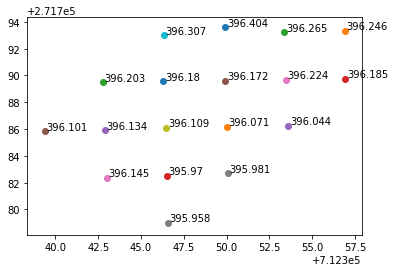

In [5]:
data = np.loadtxt('hydr_heads.txt')
Xw = data[:,0]#-np.min(data[:,0])
Yw = data[:,1]#-np.min(data[:,1])
Hw = data[:,2]

for i in range(0,len(Hw)):
    plt.scatter(Xw[i],Yw[i])
    plt.text(Xw[i]+0.1,Yw[i]+0.1,str(Hw[i]))

Target data grid

In [9]:
#Xi = np.meshgrid(np.min(Xw)+np.real([i for i in range(0,100)])*(np.max(Xw)-np.min(Xw)))
#Yi = np.meshgrid(np.min(Yw)+np.real([i for i in range(0,100)])*(np.max(Yw)-np.min(Yw)))
Xi, Yi = np.meshgrid(np.min(Xw)+np.real([i for i in range(0,100)])*(np.max(Xw)-np.min(Xw))*0.01,np.min(Yw)+np.real([i for i in range(0,100)])*(np.max(Yw)-np.min(Yw))*0.01)


print(Xi)
print(Xw)

[[712339.365   712339.54072 712339.71644 ... 712356.40984 712356.58556
  712356.76128]
 [712339.365   712339.54072 712339.71644 ... 712356.40984 712356.58556
  712356.76128]
 [712339.365   712339.54072 712339.71644 ... 712356.40984 712356.58556
  712356.76128]
 ...
 [712339.365   712339.54072 712339.71644 ... 712356.40984 712356.58556
  712356.76128]
 [712339.365   712339.54072 712339.71644 ... 712356.40984 712356.58556
  712356.76128]
 [712339.365   712339.54072 712339.71644 ... 712356.40984 712356.58556
  712356.76128]]
[712349.916 712356.892 712353.377 712356.937 712353.592 712349.91
 712353.463 712350.06  712346.485 712346.326 712346.3   712350.017
 712342.759 712346.508 712342.869 712339.365 712342.993 712346.577]


## Nearest neighbor



In [10]:
Hi = scipy.interpolate.griddata(np.vstack([Xw,Yw]).T,Hw,(Xi,Yi),method='nearest')

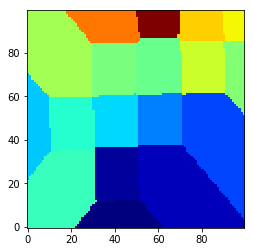

In [22]:
plt.imshow(Hi)
plt.jet()
plt.gca().invert_yaxis()

In [20]:
np.min(Hi)

395.981

## Linear interpolation

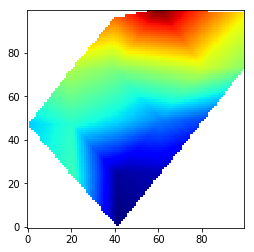

In [21]:
Hi_lin = scipy.interpolate.griddata(np.vstack([Xw,Yw]).T,Hw,(Xi,Yi),method='linear')
plt.imshow(Hi_lin)
plt.jet()
plt.gca().invert_yaxis()

## Cubic interpolation

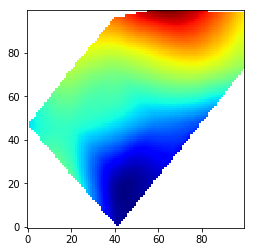

In [20]:
Hi_lin = scipy.interpolate.griddata(np.vstack([Xw,Yw]).T,Hw,(Xi,Yi),method='cubic')
plt.imshow(Hi_lin)
plt.jet()
plt.gca().invert_yaxis()

# Kriging
This section uses the pykrige module

In [23]:
import pykrige

Ordinary kriging

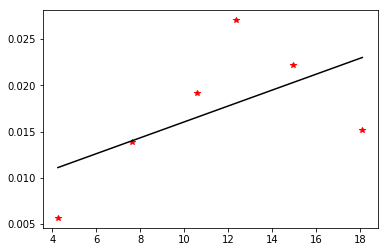

In [40]:
OK = pykrige.ok.OrdinaryKriging(data[:, 0], data[:, 1], data[:, 2], variogram_model='linear',
                     verbose=False, enable_plotting=True)

In [41]:
Xi2 = np.min(Xw)+np.real([i for i in range(0,100)])*(np.max(Xw)-np.min(Xw))*0.01
Yi2 = np.min(Yw)+np.real([i for i in range(0,100)])*(np.max(Yw)-np.min(Yw))*0.01
z, ss = OK.execute('grid', Xi2, Yi2)

In [42]:
np.shape(ss.data)

(100, 100)

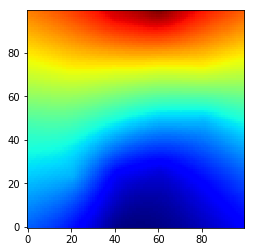

In [43]:
plt.imshow(z.data)
plt.gca().invert_yaxis()